In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from keras._tf_keras.keras.models import Sequential,load_model
from keras._tf_keras.keras.layers import Input,LSTM, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras._tf_keras.keras.preprocessing import image

In [27]:
img_height, img_width = 28, 28
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = datagen.flow_from_directory(
    'dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    'dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)
num_classes = len(train_generator.class_indices)
print(f"Number of classes (letters): {num_classes}")

Found 8389 images belonging to 63 classes.
Found 1444 images belonging to 63 classes.
Number of classes (letters): 63


In [28]:

model = Sequential([
    Input (shape=(28,28)),
    LSTM(512, return_sequences=True),
    LSTM(256),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 28, 512)        │     1,107,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 256)            │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 63)             │         8,127 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,936,447 (7.39 MB)

 Trainable params: 1,936,447 (7.39 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 34s 121ms/step - accuracy: 0.0793 - loss: 3.6937 - val_accuracy: 0.3774 - val_loss: 1.8600
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 32s 120ms/step - accuracy: 0.4780 - loss: 1.5200 - val_accuracy: 0.5443 - val_loss: 1.3158
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 32s 120ms/step - accuracy: 0.6520 - loss: 0.9951 - val_accuracy: 0.7403 - val_loss: 0.7247
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 31s 118ms/step - accuracy: 0.7747 - loss: 0.6382 - val_accuracy: 0.8012 - val_loss: 0.5823
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 33s 124ms/step - accuracy: 0.8358 - loss: 0.4772 - val_accuracy: 0.8241 - val_loss: 0.5424
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 32s 123ms/step - accuracy: 0.8501 - loss: 0.4488 - val_accuracy: 0.8663 - val_loss: 0.3972
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 32s 123ms/step - accuracy: 0.8939 - loss: 0.3050 - val_accuracy: 0.8975 - val_loss: 0.3344
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 33s 127ms/step - accuracy: 0.9093 - loss: 0

In [35]:
model.save('bry_lstm_letter_recognizer_model.h5')

In [36]:

img_path = 'test letter.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
labels = list(train_generator.class_indices.keys())
predicted_letter = labels[predicted_class_index]

print(f"Predicted Letter: {predicted_letter}")

top_indices = prediction[0].argsort()[-5:][::-1]
for i in top_indices:
    print(f"{labels[i]}: {prediction[0][i]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Letter: bo_bu
bo_bu: 0.9997
b: 0.0002
ba: 0.0000
be_bi: 0.0000
no_nu: 0.0000


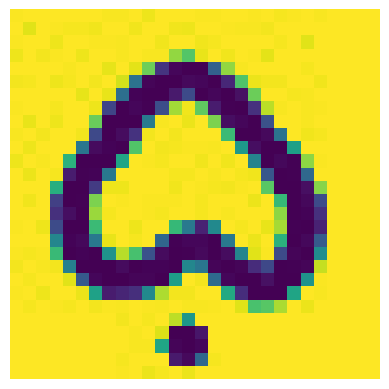

In [32]:
plt.imshow(img)
plt.axis('off')
plt.show()

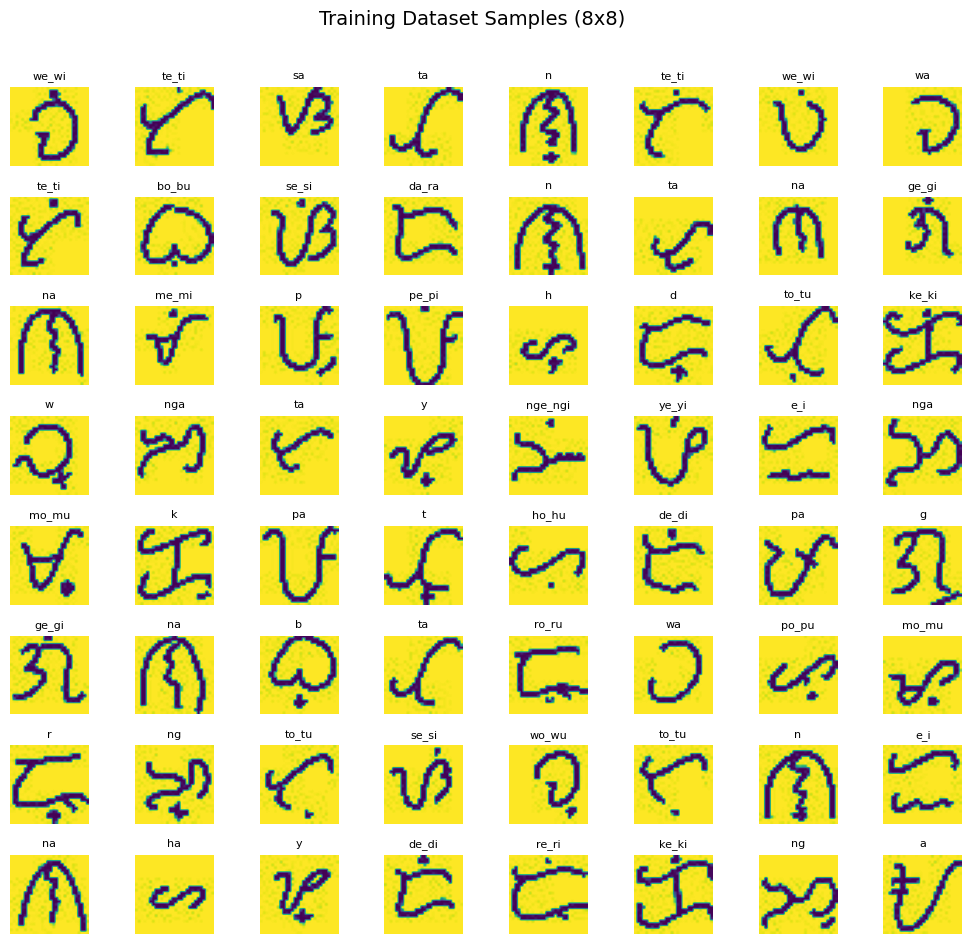

In [33]:
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])

fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

# Create a reverse lookup for class indices
labels = {v: k for k, v in train_generator.class_indices.items()}

for i, ax in enumerate(axes.flat):
    # Get a batch from the generator
    batch_images, batch_labels = next(train_generator)
    
    # Pick a random image from the batch
    rand_img_idx = np.random.randint(0, batch_images.shape[0])

    image_disp = batch_images[rand_img_idx].reshape((28, 28))
    label_index = np.argmax(batch_labels[rand_img_idx])
    label = labels[label_index]

    ax.imshow(image_disp)
    ax.set_title(label, fontsize=8)
    ax.set_axis_off()

fig.suptitle("Training Dataset Samples (8x8)", fontsize=14)
plt.show()


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


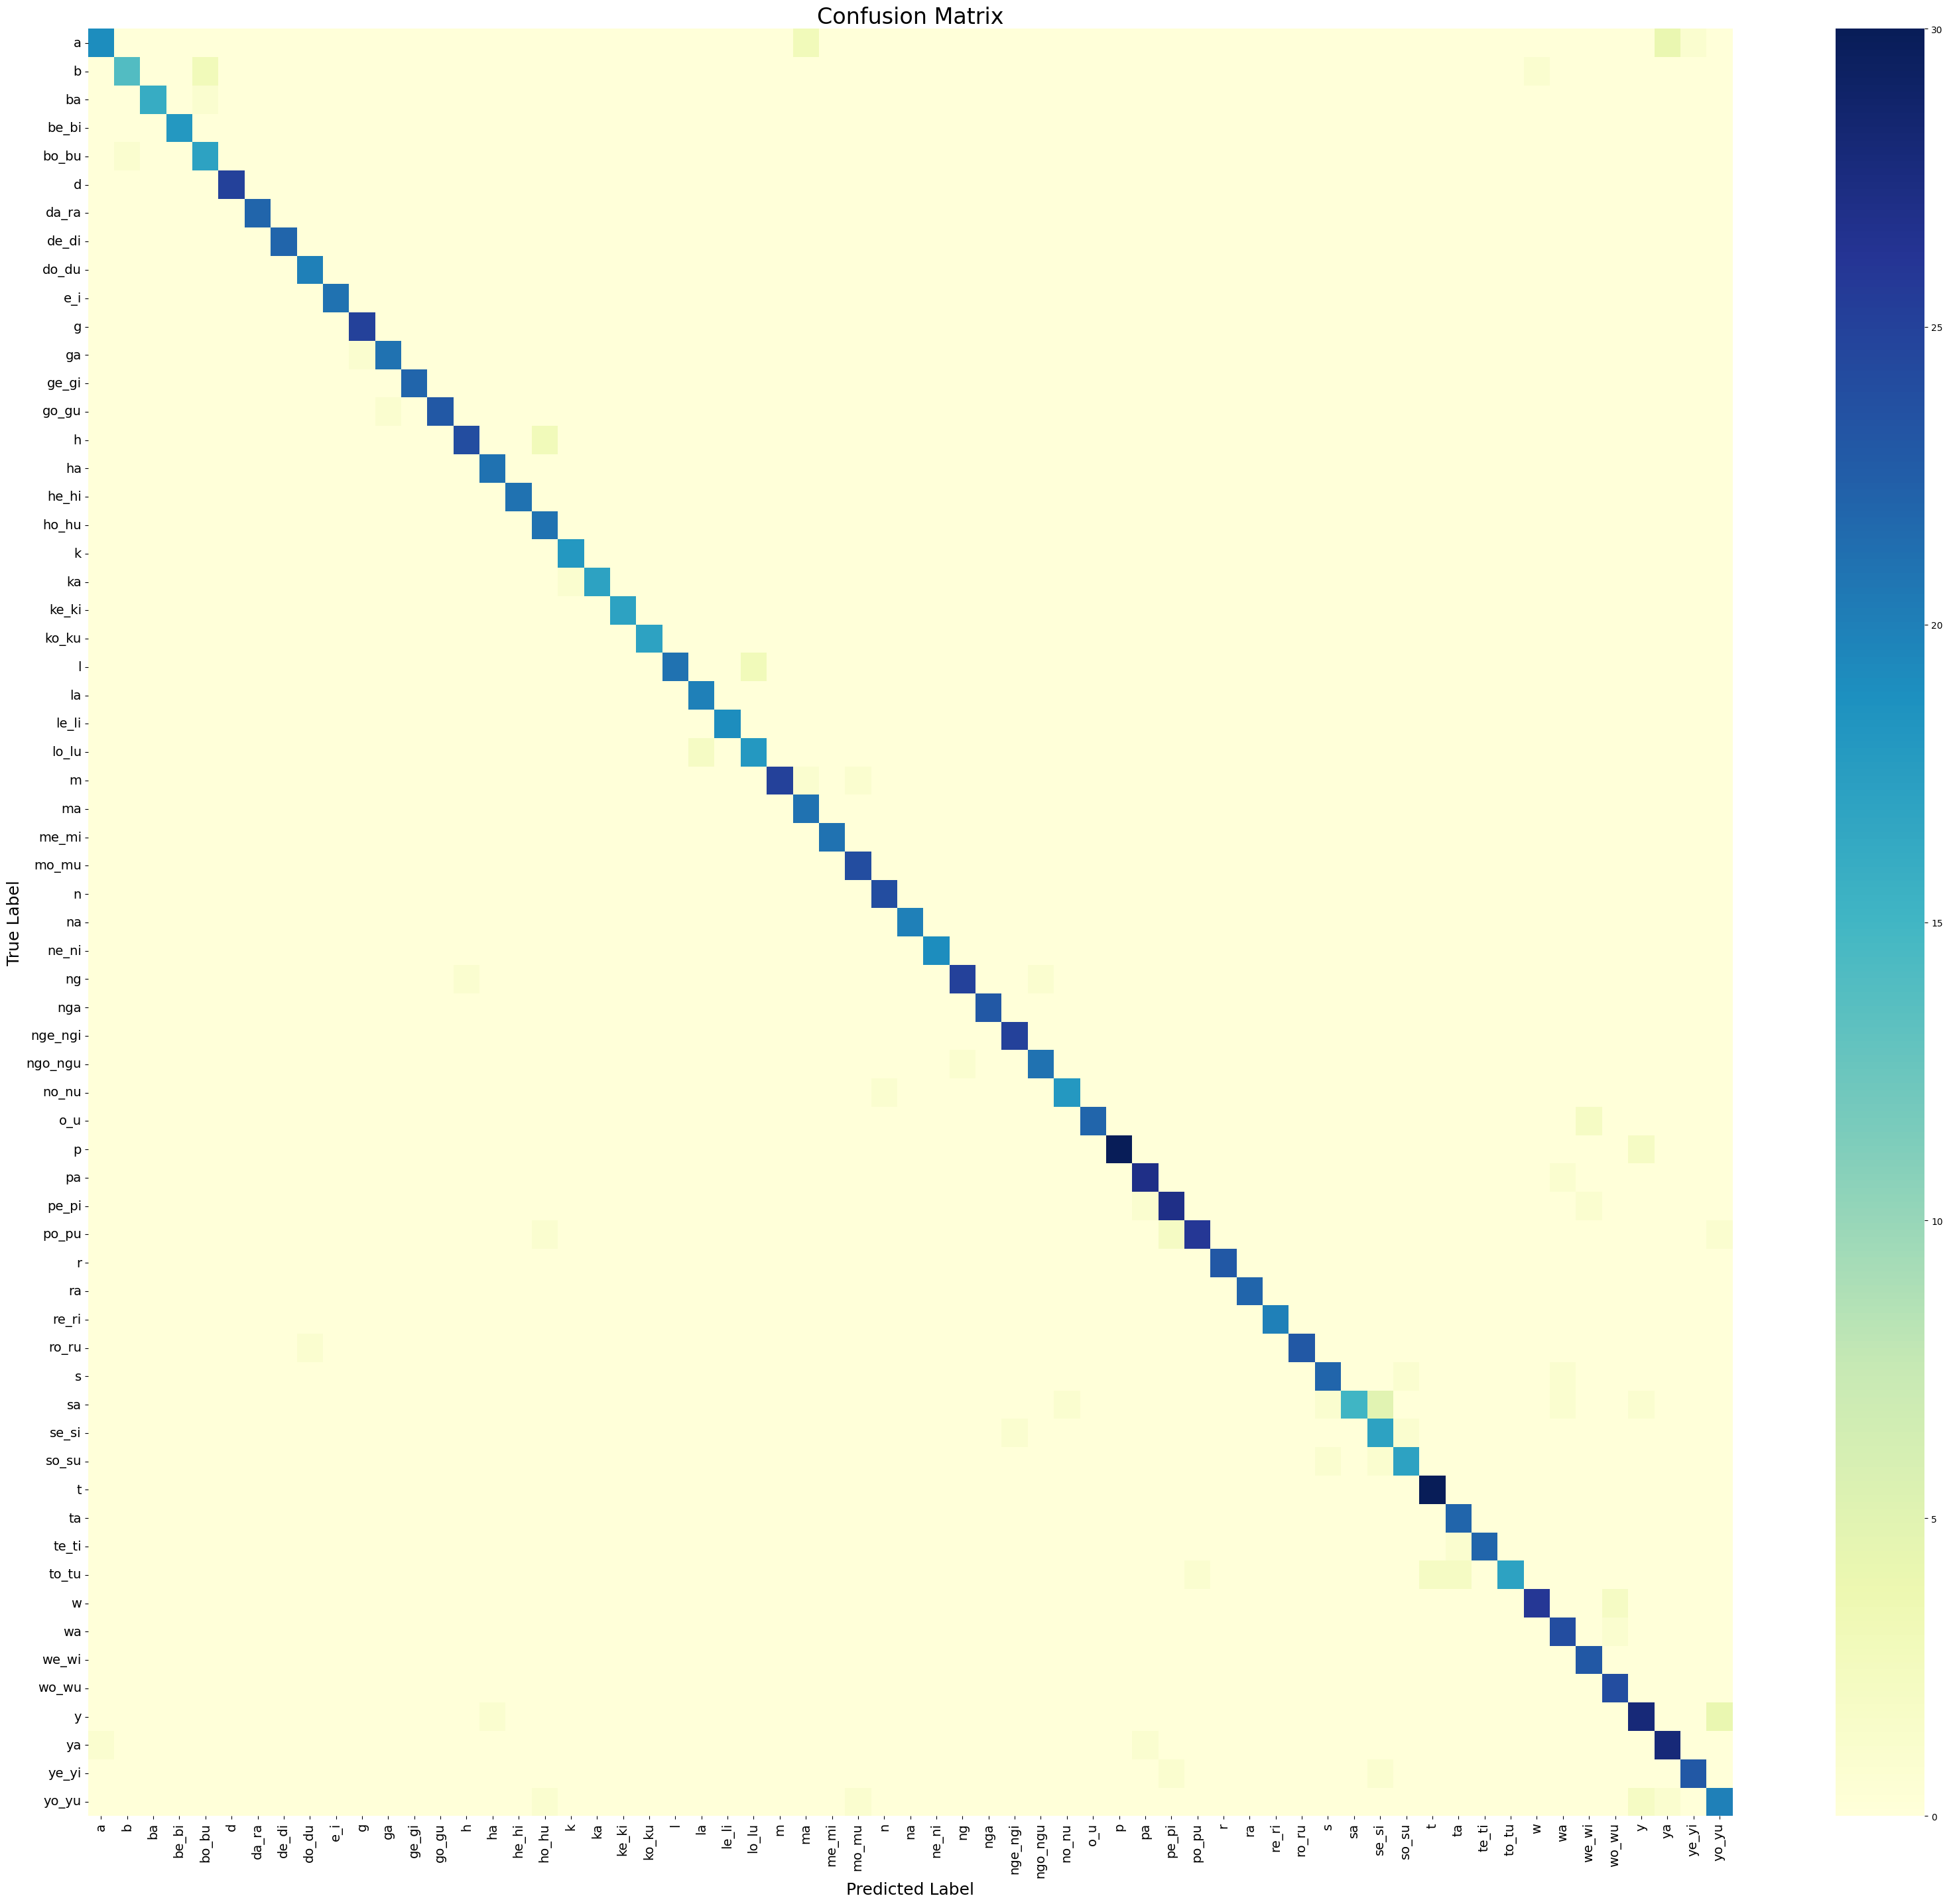

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_true, y_pred, and labels
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true labels
y_true = val_generator.classes

labels = list(train_generator.class_indices.keys())
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(40, 35))  # 🔥 increase this size to make it cleaner (30x25 for example)
sns.heatmap(cm, annot=False, fmt='d', cmap='YlGnBu',xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix", fontsize=24)
plt.xlabel("Predicted Label", fontsize=18)
plt.ylabel("True Label", fontsize=18)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
plt.show()